In [5]:
import pandas as pd
import numpy as np

from scipy.integrate import odeint
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from pyRothC.RothC import RothC
np.set_printoptions(precision=3,suppress=True )

## RothC 

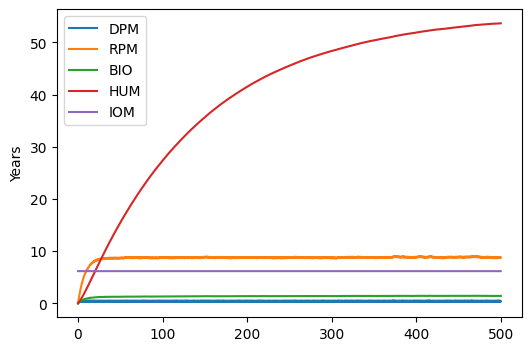

In [2]:
Temp=np.array([-0.4, 0.3, 4.2, 8.3, 13.0, 15.9,18.0, 17.5, 13.4, 8.7, 3.9,  0.6])
Precip=np.array([49, 39, 44, 41, 61, 58, 71, 58, 51,48, 50, 58])
Evp=np.array([12, 18, 35, 58, 82, 90, 97, 84, 54, 31,14, 10])

soil_thick=25  #Soil thickness (organic layer topsoil), in cm
SOC=69.7       #Soil organic carbon in Mg/ha 
clay=48        #Percent clay
input_carbon=2.7   #Annual C inputs to soil in Mg/ha/yr

IOM=0.049*SOC**(1.139) # Falloon et al. (1998)


rothC = RothC(temperature=Temp, 
             precip=Precip, 
             evaporation=Evp,
             clay = 48,
             years=500, 
             input_carbon=input_carbon,
             pE=1.0,
             C0=np.array([0, 0, 0, 0, IOM]))

df = rothC.compute()
df.index = rothC.t
fig, ax = plt.subplots(1,1,figsize=(6,4))
df.plot(ax=ax)
ax.set_ylabel('C stocks (Mg/ha)')
ax.set_ylabel('Years')
plt.show()

## Pedotranser functions for initial soil conditions

----

Paper: [Weihermueller et al. (2013)](https://bsssjournals.onlinelibrary.wiley.com/doi/pdf/10.1111/ejss.12036?casa_token=_IP4YS2QpN0AAAAA:GTB174qCuWQlDN_5IfvM_j43agtnlIcn4C2i4uG5tsKDZqnksafuCaOywdCfUh_YmI-7xljoCElLkwGqKA)

In [3]:
RPMptf=(0.184*SOC + 0.1555)*(clay + 1.275)**(-0.1158)
HUMptf=(0.7148*SOC + 0.5069)*(clay + 0.3421)**(0.0184)
BIOptf=(0.014*SOC + 0.0075)*(clay + 8.8473)**(0.0567)

DPMptf=SOC-IOM-RPMptf-HUMptf-BIOptf

C0=np.array([DPMptf, RPMptf, BIOptf, HUMptf, IOM])

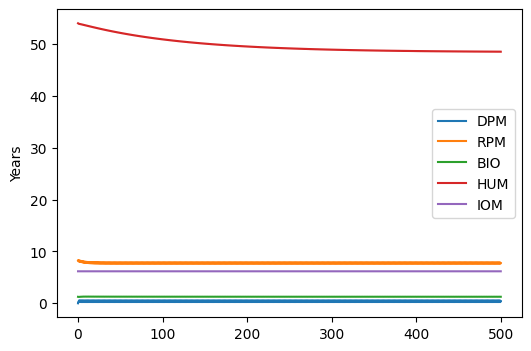

In [7]:
rothC = RothC(temperature=Temp, 
             precip=Precip, 
             evaporation=Evp,
             clay = 48,
             input_carbon=input_carbon,
             pE=1.0,
             bare=np.zeros(12),
             C0=C0)

df = rothC.compute()
df.index = rothC.t
fig, ax = plt.subplots(1,1,figsize=(6,4))
df.plot(ax=ax)
ax.set_ylabel('C stocks (Mg/ha)')
ax.set_ylabel('Years')
plt.show()

## Soil vegetation, input carbon and manure for each month
----


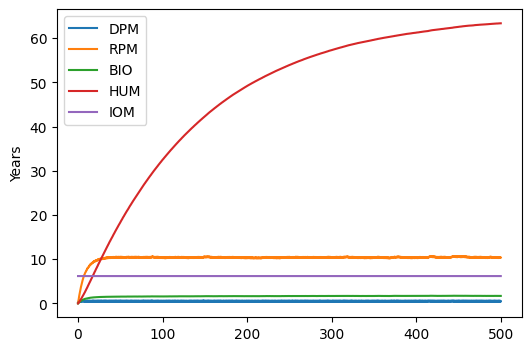

In [7]:
Temp=np.array([-0.4, 0.3, 4.2, 8.3, 13.0, 15.9,18.0, 17.5, 13.4, 8.7, 3.9,  0.6])
Precip=np.array([49, 39, 44, 41, 61, 58, 71, 58, 51,48, 50, 58])
Evp=np.array([12, 18, 35, 58, 82, 90, 97, 84, 54, 31,14, 10])

soil_thick=25  #Soil thickness (organic layer topsoil), in cm
SOC=69.7       #Soil organic carbon in Mg/ha 
clay=48        #Percent clay
#Annual C inputs to soil in Mg/ha/yr
input_carbon=np.array([0,0,0, 0.2, 0.4, 0.5, 0.2, 0.4, 1.5,0,0,0])   
soil_bare = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0])

IOM=0.049*SOC**(1.139) # Falloon et al. (1998)


rothC = RothC(temperature=Temp, 
             precip=Precip, 
             evaporation=Evp,
             clay = 48,
             years=500, 
             input_carbon=input_carbon,
             pE=1.0,
             bare=soil_bare, 
             C0=np.array([0, 0, 0, 0, IOM]))

df = rothC.compute()
df.index = rothC.t
fig, ax = plt.subplots(1,1,figsize=(6,4))
df.plot(ax=ax)
ax.set_ylabel('C stocks (Mg/ha)')
ax.set_ylabel('Years')
plt.show()

In [1]:
import pandas as pd
import numpy as np

from scipy.integrate import odeint
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from pyRothC.RothC_Mediterranean import RothC_MM
np.set_printoptions(precision=3,suppress=True )

/Users/mikhailgasanov/Documents/GIT/pyRothC/notebooks/../pyRothC/RothC_Mediterranean.py:57: RuntimeWarning: divide by zero encountered in scalar power
  + 0.0449 * (OC * 1.72) ** -1
/Users/mikhailgasanov/Documents/GIT/pyRothC/notebooks/../pyRothC/RothC_Mediterranean.py:59: RuntimeWarning: divide by zero encountered in log
  + 0.1482 * np.log(OC * 1.72)
/Users/mikhailgasanov/Documents/GIT/pyRothC/notebooks/../pyRothC/RothC_Mediterranean.py:48: RuntimeWarning: invalid value encountered in scalar add
  -14.96
/Users/mikhailgasanov/Documents/GIT/pyRothC/notebooks/../pyRothC/RothC_Mediterranean.py:94: RuntimeWarning: divide by zero encountered in scalar power
  - 0.01958 * (OC * 1.72) ** -1
/Users/mikhailgasanov/Documents/GIT/pyRothC/notebooks/../pyRothC/RothC_Mediterranean.py:96: RuntimeWarning: divide by zero encountered in log
  - 0.0709 * np.log(OC * 1.72)
/Users/mikhailgasanov/Documents/GIT/pyRothC/notebooks/../pyRothC/RothC_Mediterranean.py:84: RuntimeWarning: invalid value encountere

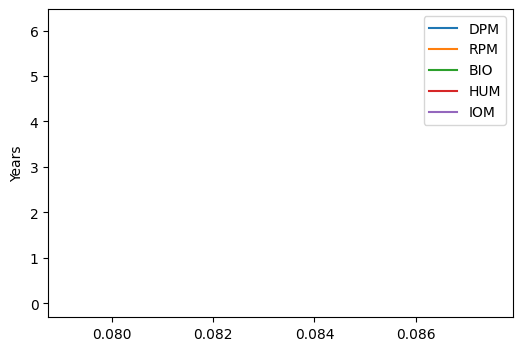

In [2]:
Temp=np.array([-0.4, 0.3, 4.2, 8.3, 13.0, 15.9,18.0, 17.5, 13.4, 8.7, 3.9,  0.6])
Precip=np.array([49, 39, 44, 41, 61, 58, 71, 58, 51,48, 50, 58])
Evp=np.array([12, 18, 35, 58, 82, 90, 97, 84, 54, 31,14, 10])

soil_thick=25  #Soil thickness (organic layer topsoil), in cm
SOC=69.7       #Soil organic carbon in Mg/ha 
clay=48        #Percent clay
input_carbon=2.7   #Annual C inputs to soil in Mg/ha/yr

IOM=0.049*SOC**(1.139) # Falloon et al. (1998)


rothC = RothC_MM(temperature=Temp, 
             precip=Precip, 
             evaporation=Evp,
             clay = 48,
             years=500, 
             input_carbon=input_carbon,
             pE=1.0,
             C0=np.array([0, 0, 0, 0, IOM]))

df = rothC.compute()
df.index = rothC.t
fig, ax = plt.subplots(1,1,figsize=(6,4))
df.plot(ax=ax)
ax.set_ylabel('C stocks (Mg/ha)')
ax.set_ylabel('Years')
plt.show()

In [1]:


class Pedotransfer:
    def __init__(self) -> None:
        pass
        # self.theta_R: float = 0.01
        # self._t: float = 1.0

    def calc_mbar(self, x):
        return 1000.0 * x

    def equation_alpha(self, Silt, Clay, OC, BD, t):
        return np.exp(
            -14.96
            + 0.03135 * Silt
            + 0.0351 * Clay
            + 0.646 * OC * (BD * 1.72)
            + 15.29 * OC
            - 0.192 * BD
            - 4.671 * BD**2
            - 0.000781 * Clay**2
            - 0.00687 * (OC * 1.72) ** 2
            + 0.0449 * (OC * 1.72) ** -1
            + 0.0663 * np.log(BD)
            + 0.1482 * np.log(OC * 1.72)
            - 0.04546 * OC * BD
            - 0.4852 * OC * (BD * 1.72)
            + 0.00673 * BD * t
        )

    def equation_theta_s(self, Silt, Clay, OC, BD, t):
        return (
            0.7919
            + 0.001691 * Clay
            - 0.29619 * BD
            - 0.000001491 * Silt**2
            + 0.0000821 * (OC * 1.72) ** 2
            + 0.02427 * Clay**-1
            + 0.01113 * Silt**-1
            + 0.01472 * np.log(Silt)
            - 0.0000733 * (OC * 1.72) * Clay
            - 0.000619 * BD * Clay
            - 0.001183 * BD * (OC * 1.72)
            - 0.0001664 * Silt * t
        )

    def equation_n(self, Silt, Clay, OC, BD, t):
        return (
            np.exp(
                -25.23
                - 0.02195 * Clay
                + 0.0074 * Silt
                - 0.194 * (OC * 1.72)
                + 45.5 * OC
                - 7.24 * BD**2
                + 0.0003658 * Clay**2
                + 0.002885 * (OC * 1.72) ** 2
                - 12.81 * BD**-1
                - 0.1524 * Silt**-1
                - 0.01958 * (OC * 1.72) ** -1
                - 0.2876 * np.log(Silt)
                - 0.0709 * np.log(OC * 1.72)
                - 44.6 * np.log(BD)
                - 0.02264 * BD * Clay
                + 0.0896 * BD * (OC * 1.72)
                + 0.00718 * Clay * t
            )
            + 1
        )

    def equation_wc(self, theta_R, theta_s, alpha, n, mbar):
        return theta_R + (theta_s - theta_R) / (
            (1 + (alpha + mbar) ** n) ** (1 - (1 / n))
        )

    def calc_WCi(self, Silt, Clay, OC, BD, theta_R, t, bar):
        theta_s = self.equation_theta_s(Silt, Clay, OC, BD, t)
        alpha = self.equation_alpha(Silt, Clay, OC, BD, t)
        n = self.equation_n(Silt, Clay, OC, BD, t)
        mbar = self.calc_mbar(bar)
        return self.equation_wc(theta_R, theta_s, alpha, n, mbar)

    def calc_M_i(self, WC_i, WC_fc, depth):
        # To convert from water content to soil moisture deficit (mm) used by RothC the following equation is used
        return (WC_i - WC_fc) * 10 * depth

    def calc_Mis(
        self,
        silt,
        clay,
        BD,
        C,
        t: float = 1.0,
        theta_R: float = 0.01,
        soil_thickness: float = 23,
    ):
        # From Annex A Pedotransfer functions
        # used to calculate the hydraulic properties
        # At Farina et al 2013
        Silt = silt
        Clay = clay
        OC = np.sum(C[:-1])
        # Water content at field capacity
        WCfc = self.calc_WCi(Silt, Clay, OC, BD, theta_R, t, -0.05)
        WCb = self.calc_WCi(Silt, Clay, OC, BD, theta_R, t, -1)
        # pwp - permanent wilting point
        WCpwp = self.calc_WCi(Silt, Clay, OC, BD, theta_R, t, -15)
        # capillary water retained at âˆ’ 1000 bar
        WCc = self.calc_WCi(Silt, Clay, OC, BD, theta_R, t, -1000)
        Mb = self.calc_M_i(WCb, WCfc, soil_thickness)
        Mpwp = self.calc_M_i(WCpwp, WCfc, soil_thickness)
        Mc = self.calc_M_i(WCc, WCfc, soil_thickness)
        return Mb, Mpwp, Mc



In [2]:
pdf = Pedotransfer()

In [6]:
SOC=69.7       #Soil organic carbon in Mg/ha 
clay=48        #Percent clay

RPMptf=(0.184*SOC + 0.1555)*(clay + 1.275)**(-0.1158)
HUMptf=(0.7148*SOC + 0.5069)*(clay + 0.3421)**(0.0184)
BIOptf=(0.014*SOC + 0.0075)*(clay + 8.8473)**(0.0567)
IOM=0.049*SOC**(1.139) # Falloon et al. (1998)
DPMptf=SOC-IOM-RPMptf-HUMptf-BIOptf

C0=np.array([DPMptf, RPMptf, BIOptf, HUMptf, IOM])

pdf.calc_Mis(silt=20,
        clay=clay,
        BD=1.3,
        C=C0 ,
        t = 1.0,
        theta_R = 0.01,
        soil_thickness = 23)

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_2346/1186509868.py:11: RuntimeWarning: overflow encountered in exp
  return np.exp(
/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_2346/1186509868.py:47: RuntimeWarning: overflow encountered in exp
  np.exp(


(0.0, 0.0, 0.0)

## End